<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.830536,88.532802,72.447985,3113.522972,3361.334296,1663.953947,1697.380349
1,0.0,1.0,97.983389,54.887302,42.211366,2997.743200,3202.825257,2013.700280,1189.124978
2,0.0,2.0,36.122573,55.899059,86.929703,-178.565900,10.385435,-758.738923,769.124358
3,0.0,3.0,77.997624,76.271964,92.757865,1621.109769,1878.137222,1089.960686,788.176536
4,0.0,4.0,98.317079,39.855651,69.553503,-2949.337682,-2731.611451,1235.223299,-3966.834749
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.712575,57.644811,24.988270,130.782095,252.127751,-783.440541,1035.568291
119996,999.0,116.0,40.155864,74.985693,69.446531,3168.739323,3363.327410,-799.555944,4162.883355
119997,999.0,117.0,76.213353,45.270326,99.357349,-2675.388410,-2444.547381,-140.680408,-2303.866973
119998,999.0,118.0,57.038039,46.141433,32.273232,2521.421725,2666.874428,-1.636758,2668.511185


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.830536,88.532802,72.447985,3113.522972,3361.334296,1663.953947,1697.380349
1,0.0,1.0,97.983389,54.887302,42.211366,2997.743200,3202.825257,2013.700280,1189.124978
2,0.0,2.0,36.122573,55.899059,86.929703,-178.565900,10.385435,-758.738923,769.124358
3,0.0,3.0,77.997624,76.271964,92.757865,1621.109769,1878.137222,1089.960686,788.176536
4,0.0,4.0,98.317079,39.855651,69.553503,-2949.337682,-2731.611451,1235.223299,-3966.834749
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.712575,57.644811,24.988270,130.782095,252.127751,-783.440541,1035.568291
119996,999.0,116.0,40.155864,74.985693,69.446531,3168.739323,3363.327410,-799.555944,4162.883355
119997,999.0,117.0,76.213353,45.270326,99.357349,-2675.388410,-2444.547381,-140.680408,-2303.866973
119998,999.0,118.0,57.038039,46.141433,32.273232,2521.421725,2666.874428,-1.636758,2668.511185


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    76.830536  88.532802  ...  1663.953947  1697.380349
      1.0    97.983389  54.887302  ...  2013.700280  1189.124978
      2.0    36.122573  55.899059  ...  -758.738923   769.124358
      3.0    77.997624  76.271964  ...  1089.960686   788.176536
      4.0    98.317079  39.855651  ...  1235.223299 -3966.834749
...                ...        ...  ...          ...          ...
999.0 115.0  28.712575  57.644811  ...  -783.440541  1035.568291
      116.0  40.155864  74.985693  ...  -799.555944  4162.883355
      117.0  76.213353  45.270326  ...  -140.680408 -2303.866973
      118.0  57.038039  46.141433  ...    -1.636758  2668.511185
      119.0  72.880854  82.210045  ...   320.694450 -2483.701094

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    76.830536  88.532802  ...  1663.953947  1697.380349
      1.0    97.983389  54.887302  ...  2013.700280  1189.124978
      2.0    36.122573  55.899059  ...  -758.738923   769.124358
      3.0    77.997624  76.271964  ...  1089.960686   788.176536
      4.0    98.317079  39.855651  ...  1235.223299 -3966.834749
...                ...        ...  ...          ...          ...
999.0 115.0  28.712575  57.644811  ...  -783.440541  1035.568291
      116.0  40.155864  74.985693  ...  -799.555944  4162.883355
      117.0  76.213353  45.270326  ...  -140.680408 -2303.866973
      118.0  57.038039  46.141433  ...    -1.636758  2668.511185
      119.0  72.880854  82.210045  ...   320.694450 -2483.701094

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.830536,88.532802,72.447985,3113.522972,3361.334296,1663.953947,1697.380349
1,0.0,1.0,97.983389,54.887302,42.211366,2997.743200,3202.825257,2013.700280,1189.124978
2,0.0,2.0,36.122573,55.899059,86.929703,-178.565900,10.385435,-758.738923,769.124358
3,0.0,3.0,77.997624,76.271964,92.757865,1621.109769,1878.137222,1089.960686,788.176536
4,0.0,4.0,98.317079,39.855651,69.553503,-2949.337682,-2731.611451,1235.223299,-3966.834749
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.712575,57.644811,24.988270,130.782095,252.127751,-783.440541,1035.568291
119996,999.0,116.0,40.155864,74.985693,69.446531,3168.739323,3363.327410,-799.555944,4162.883355
119997,999.0,117.0,76.213353,45.270326,99.357349,-2675.388410,-2444.547381,-140.680408,-2303.866973
119998,999.0,118.0,57.038039,46.141433,32.273232,2521.421725,2666.874428,-1.636758,2668.511185


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    76.830536  88.532802  ...  1663.953947  1697.380349
      1.0    97.983389  54.887302  ...  2013.700280  1189.124978
      2.0    36.122573  55.899059  ...  -758.738923   769.124358
      3.0    77.997624  76.271964  ...  1089.960686   788.176536
      4.0    98.317079  39.855651  ...  1235.223299 -3966.834749
...                ...        ...  ...          ...          ...
999.0 115.0  28.712575  57.644811  ...  -783.440541  1035.568291
      116.0  40.155864  74.985693  ...  -799.555944  4162.883355
      117.0  76.213353  45.270326  ...  -140.680408 -2303.866973
      118.0  57.038039  46.141433  ...    -1.636758  2668.511185
      119.0  72.880854  82.210045  ...   320.694450 -2483.701094

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

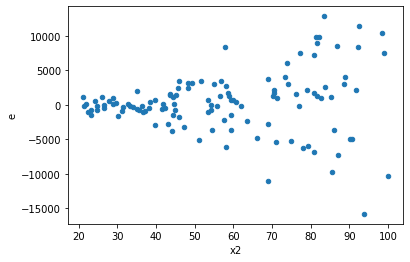

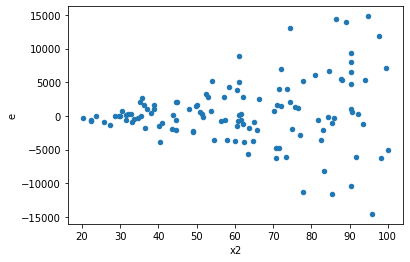

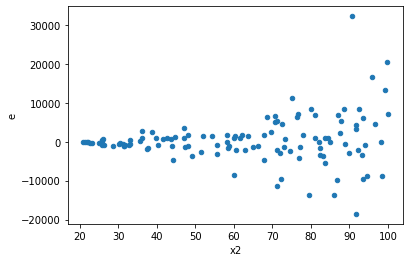

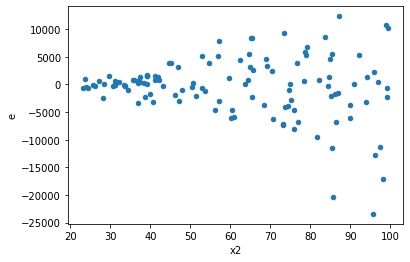

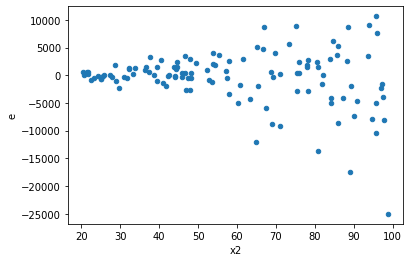

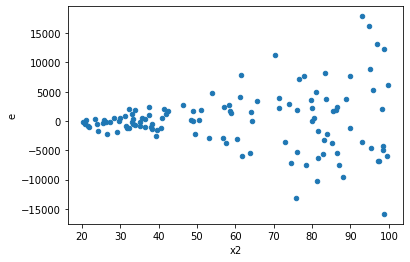

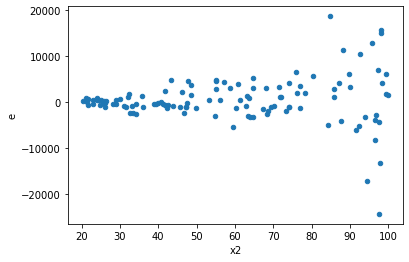

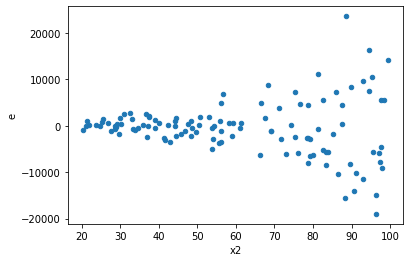

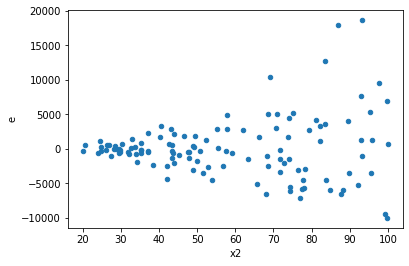

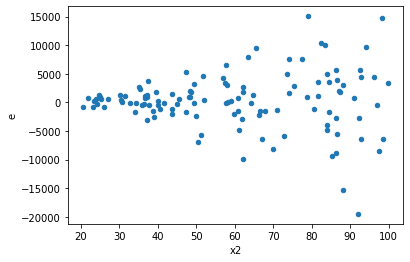

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,1781409109.2549763,89475961.49418013,40486570.66488583,2033544.5794131847,19.909359782301376,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,2282757731.9215155,128855492.36975494,51880857.5436708,2928533.9174944307,17.715641684648332,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,3439297116.2103615,110856263.13098873,78165843.5502355,2519460.5257042893,31.02483359146301,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,2705131173.678705,117142410.60280386,61480253.9472433,2662327.5137000876,23.092671217523645,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,2172655461.0074306,70935362.0757614,49378533.20471433,1612167.319903668,30.628665272575336,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,2427899152.584079,61891876.74932364,55179526.1950927,1406633.562484628,39.22807450834994,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,2488678128.0595193,78303822.7945618,56560866.54680726,1779632.336240041,31.782332448682926,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,3752076849.012726,95724290.82958657,85274473.84119831,2175552.0643087854,39.19670562712625,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,1765177269.8203154,85989072.48726639,40117665.22318899,1954297.1019833272,20.527925453338387,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,1781409109.2549763,89475961.49418013,40486570.66488583,2033544.5794131847,19.909359782301376,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,2282757731.9215155,128855492.36975494,51880857.5436708,2928533.9174944307,17.715641684648332,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,3439297116.2103615,110856263.13098873,78165843.5502355,2519460.5257042893,31.02483359146301,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,2705131173.678705,117142410.60280386,61480253.9472433,2662327.5137000876,23.092671217523645,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,2172655461.0074306,70935362.0757614,49378533.20471433,1612167.319903668,30.628665272575336,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,2427899152.584079,61891876.74932364,55179526.1950927,1406633.562484628,39.22807450834994,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,2488678128.0595193,78303822.7945618,56560866.54680726,1779632.336240041,31.782332448682926,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,3752076849.012726,95724290.82958657,85274473.84119831,2175552.0643087854,39.19670562712625,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,1765177269.8203154,85989072.48726639,40117665.22318899,1954297.1019833272,20.527925453338387,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64